In [19]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard

In [20]:
def load_data():
    # defining the input image size 
    input_image = Input(shape =(28, 28, 1))
      
    # Loading the data and dividing the data into training and testing sets
    (X_train, _), (X_test, _) = mnist.load_data()
      
    # Cleaning and reshaping the data as required by the model
    X_train = X_train.astype('float32') / 255.
    X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
    X_test = X_test.astype('float32') / 255.
    X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
      
    return X_train, X_test, input_image

In [21]:
def build_network(input_image):
      
    # Building the encoder of the Auto-encoder
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding ='same')(x)
      
    # Building the decoder of the Auto-encoder
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation ='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x)
      
    return decoded_layer

In [22]:
def build_auto_encoder_model(X_train, X_test, input_image, decoded_layer):
      
    # Defining the parameters of the Auto-encoder
    autoencoder = Model(input_image, decoded_layer)
    autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy')
      
    # Training the Auto-encoder
    autoencoder.fit(X_train, X_train,
                epochs = 15,
                batch_size = 256,
                shuffle = True,
                validation_data =(X_test, X_test),
                callbacks =[TensorBoard(log_dir ='/tmp / autoencoder')])
      
    return autoencoder

In [23]:
def visualize(model, X_test):
      
    # Reconstructing the encoded images
    reconstructed_images = model.predict(X_test)
      
    plt.figure(figsize =(20, 4))
    for i in range(1, 11):
          
        # Generating a random to get random results
        rand_num = randint(0, 10001)
      
        # To display the original image
        ax = plt.subplot(2, 10, i)
        plt.imshow(X_test[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
        # To display the reconstructed image
        ax = plt.subplot(2, 10, i + 10)
        plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
          
    # Displaying the plot
    plt.show()

In [24]:
X_train, X_test, input_image = load_data()

In [25]:
decoded_layer = build_network(input_image)

In [26]:
auto_encoder_model = build_auto_encoder_model(X_train,X_test,input_image,decoded_layer)

Epoch 1/15
235/235 [==============================] - 3s 9ms/step - loss: 0.2614 - val_loss: 0.1719
Epoch 2/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1567 - val_loss: 0.1428
Epoch 3/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1374 - val_loss: 0.1306
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1278 - val_loss: 0.1228
Epoch 5/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1220 - val_loss: 0.1188
Epoch 6/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1183 - val_loss: 0.1155
Epoch 7/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1156 - val_loss: 0.1132
Epoch 8/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1135 - val_loss: 0.1115
Epoch 9/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1117 - val_loss: 0.1096
Epoch 10/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1101 - val_loss: 0.1083

313/313 [==============================] - 1s 2ms/step


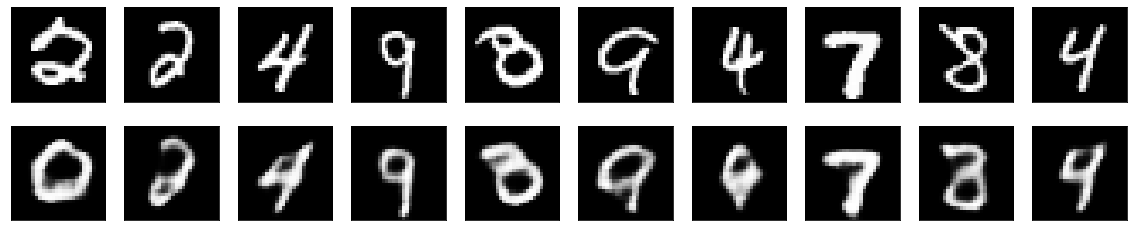

In [27]:
visualize(auto_encoder_model, X_test)